In [920]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [921]:
apple_stock_data = pd.read_csv('HistoricalData_1677173271413 2.csv')

In [922]:
apple_stock_data.head(10)


,Date,Close/Last,Volume,Open,High,Low
0,02/22/2023,$148.91,51011310,$148.87,$149.95,$147.16
1,02/21/2023,$148.48,58867230,$150.2,$151.3,$148.405
2,02/17/2023,$152.55,59144120,$152.35,$153,$150.85
3,02/16/2023,$153.71,68167940,$153.51,$156.33,$153.3475
4,02/15/2023,$155.33,65669250,$153.11,$155.5,$152.88
5,02/14/2023,$153.2,61707570,$152.12,$153.77,$150.86
6,02/13/2023,$153.85,62199010,$150.952,$154.26,$150.92
7,02/10/2023,$151.01,57450710,$149.46,$151.3401,$149.22
8,02/09/2023,$150.87,56007140,$153.775,$154.33,$150.42
9,02/08/2023,$151.92,64120080,$153.88,$154.58,$151.168


In [923]:
apple_open_price = apple_stock_data['Open'].map(lambda x: str(x).lstrip('$')).values

In [924]:
# apple_open_price = apple_stock_data[['Open']]

In [925]:
apple_open_price.shape

(126,)

In [926]:
apple_open_price = apple_open_price.reshape(-1,1)

In [927]:
apple_open_price.shape

(126, 1)

In [928]:
apple_prices_scaled = scalar.fit_transform(apple_open_price)

In [929]:
apple_prices_scaled

array([[0.51301616],
       [0.54286355],
       [0.59111311],
       [0.61714542],
       [0.60816876],
       [0.58595153],
       [0.55973968],
       [0.52625673],
       [0.62309246],
       [0.62544883],
       [0.55273788],
       [0.59616248],
       [0.49416517],
       [0.51368941],
       [0.40305206],
       [0.37455117],
       [0.42515709],
       [0.38476212],
       [0.38509874],
       [0.33393178],
       [0.32080341],
       [0.2717684 ],
       [0.20803411],
       [0.18110413],
       [0.24248205],
       [0.19793537],
       [0.13509874],
       [0.1766158 ],
       [0.11759425],
       [0.09537702],
       [0.09997756],
       [0.        ],
       [0.02513465],
       [0.01974865],
       [0.09582585],
       [0.05385996],
       [0.04443447],
       [0.08213645],
       [0.12051167],
       [0.11018851],
       [0.18720826],
       [0.15641831],
       [0.12073609],
       [0.20421903],
       [0.23956463],
       [0.33886894],
       [0.43402154],
       [0.527

In [930]:
num_of_prices = len(apple_prices_scaled)
num_of_prices

126

In [931]:
apple_price_Xfeatures = []
apple_price_ylabels = []
for i in range(10,(num_of_prices)):
    apple_price_Xfeatures.append(apple_prices_scaled[i-10:i, 0])
    apple_price_ylabels.append(apple_prices_scaled[i, 0])

In [932]:
X_train = np.array(apple_price_Xfeatures[0:100])
y_train = np.array(apple_price_ylabels[0:100])

In [933]:
print(X_train.shape)
print(y_train.shape)

(100, 10)
(100,)


In [934]:
#restructure to LSTM model standards
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_train.shape

(100, 10, 1)

In [935]:
X_test = np.array(apple_price_Xfeatures[101:])
y_test = np.array(apple_price_ylabels[101:])

In [936]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(15, 10, 1)

In [937]:
model = Sequential()

model.add(LSTM(100, activation='relu', return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))

model.add(LSTM(120, activation='relu', return_sequences = True))
# model.add(Dropout(0.1))

model.add(LSTM(80, activation='relu', return_sequences = True))
# model.add(Dropout(0.1))

model.add(LSTM(50, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')



# lstm1 = LSTM(100, activation='relu', return_sequences = True)(input_layer)

# drop1 = Dropout(0.1)(lstm1)

# lstm2 = LSTM(120, activation='relu', return_sequences = True)(drop1)

# lstm3 = LSTM(80, activation='relu', return_sequences = True)(lstm2)

# lstm4 = LSTM(50, activation='relu', return_sequences = True)(lstm3)

# output_layer = Dense(1)(lstm4)

# model = Model(input_layer, output_layer)

# model.compile(optimizer='adam', loss='mse')


In [938]:
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_44 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_101 (LSTM)             (None, 10, 120)           106080    
                                                                 
 lstm_102 (LSTM)             (None, 10, 80)            64320     
                                                                 
 lstm_103 (LSTM)             (None, 50)                26200     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 237,451
Trainable params: 237,451
Non-t

In [939]:
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=25)

In [940]:
model_hist = model.fit(X_train, y_train, batch_size=20, epochs=450, validation_data=(X_test, y_test), verbose=1)

Epoch 1/450
5/5 [==============================] - 1s 54ms/step - loss: 0.1450 - val_loss: 0.4777
Epoch 2/450
5/5 [==============================] - 0s 12ms/step - loss: 0.0770 - val_loss: 0.1530
Epoch 3/450
5/5 [==============================] - 0s 15ms/step - loss: 0.0373 - val_loss: 0.0360
Epoch 4/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0247 - val_loss: 0.1672
Epoch 5/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0273 - val_loss: 0.1678
Epoch 6/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0247 - val_loss: 0.1056
Epoch 7/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0789
Epoch 8/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0956
Epoch 9/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0221 - val_loss: 0.1166
Epoch 10/450
5/5 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.0711
Epoch 11/450
5/5 [=

In [941]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 160ms/step


In [942]:
predictions.shape

(15, 1)

In [943]:
predictions = scalar.inverse_transform(predictions)

In [944]:
print(predictions)

[[151.15323]
 [151.84052]
 [153.39546]
 [153.92795]
 [154.16339]
 [154.4792 ]
 [155.24968]
 [157.38387]
 [157.81166]
 [158.13571]
 [160.73892]
 [160.8585 ]
 [164.34644]
 [168.84209]
 [172.3396 ]]


In [945]:
y_test = y_test.reshape(-1,1)

In [946]:
y_test = scalar.inverse_transform(y_test)

In [947]:
print(y_test)

[[159.9  ]
 [159.59 ]
 [155.47 ]
 [154.64 ]
 [154.825]
 [156.47 ]
 [159.75 ]
 [156.64 ]
 [160.305]
 [162.13 ]
 [161.145]
 [170.57 ]
 [168.78 ]
 [167.32 ]
 [167.08 ]]


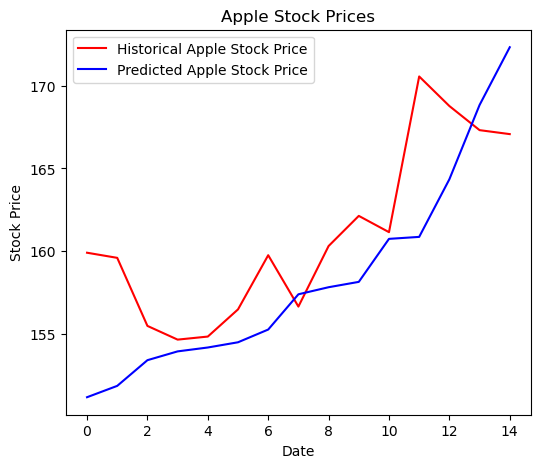

In [948]:
plt.figure(figsize=(6,5))
plt.plot(y_test, color='red', label='Historical Apple Stock Price')
plt.plot(predictions, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()


In [951]:
mean_squared_error(y_test, predictions)

22.190947303118275